In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [17]:
from scipy.stats import skew
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression, LassoLarsCV,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.cross_validation import train_test_split , StratifiedKFold

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def factorize(df, factor_df, column, fill_na=None):
    factor_df[column] = df[column]
    if fill_na is not None:
        factor_df[column].fillna(fill_na, inplace=True)
    le.fit(factor_df[column].unique())
    factor_df[column] = le.transform(factor_df[column])
    return factor_df

In [41]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Drop rows from train_df that contain outlier observations in Garage Area and GrLivArea
train_df.drop(train_df[train_df["GarageArea"] > 1200].index, inplace=True)
train_df.drop(train_df[train_df["GrLivArea"] > 4000].index, inplace=True)

print ("Train data shape:", train_df.shape)
print ("Test data shape:", test_df.shape)

# Save ID columns for modeling later on.
train_ID = train_df['Id']
test_ID = test_df['Id']

# Now drop the 'Id' colum since we can not use it as a feature to train our model.
# train_df.drop("Id", axis = 1, inplace = True)
# test_df.drop("Id", axis = 1, inplace = True)



x_train = train_df.drop('SalePrice', axis=1)
target = train_df['SalePrice']

x_test = test_df.copy()

print("\n")
print("Train predictors shape:", x_train.shape)
print("Train target shape:", target.shape)
print("Test set:", x_test.shape)

Train data shape: (1452, 81)
Test data shape: (1459, 80)


Train predictors shape: (1452, 80)
Train target shape: (1452,)
Test set: (1459, 80)


In [42]:
# Create df by concatenating train and test df's.

temp = pd.concat([x_train, x_test], ignore_index=True)
temp.shape

(2911, 80)

In [46]:
temp['MasVnrType'].isnull().sum()

24

In [30]:
def transform_features(df):
    
    all_data = pd.DataFrame(index = df.index)

    all_data["MSSubClass"] = df["MSSubClass"]
    
    all_data["MSZoning"] = df["MSZoning"]
    
    all_data["Neighborhood"] = df["Neighborhood"]
    
    all_data["LotFrontage"] = df["LotFrontage"]   
    all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
    
    all_data["LotArea"] = df["LotArea"]
    
    all_data["Street"] = df["Street"]
    
    all_data["Alley"] = df["Alley"]
    
    all_data["LotShape"] = df["LotShape"]
    
    all_data["LandContour"] = df["LandContour"]
    
    all_data["Utilities"] = df["Utilities"]
    all_data['Utilities'] = all_data['Utilities'].astype('category')
    
    all_data["LotConfig"] = df["LotConfig"]
    
    all_data["LandSlope"] = df["LandSlope"]
    
    all_data["Condition1"] = df["Condition1"] 
    
    all_data["Condition2"] = df["Condition2"]
    
    all_data["BldgType"] = df["BldgType"]
    
    all_data["HouseStyle"] = df["HouseStyle"] 
    
    all_data["OverallQual"] = df["OverallQual"] 
    
    all_data["OverallCond"] = df["OverallCond"] 
    
    all_data["YearBuilt"] = df["YearBuilt"]
    
    all_data["YearRemodAdd"] = df["YearRemodAdd"]
    
    all_data["RoofStyle"] = df["RoofStyle"]
    
    all_data["RoofMatl"] = df["RoofMatl"]
    
    all_data["Exterior1st"] = df["Exterior1st"]
    
    all_data["Exterior2nd"] = df["Exterior2nd"]
    
    all_data["MasVnrType"] = df["MasVnrType"]
    
    all_data["MasVnrArea"] = df["MasVnrArea"]
    
    all_data["ExterQual"] = df["ExterQual"]
    
    all_data["ExterCond"] = df["ExterCond"]
    
    all_data["Foundation"] = df["Foundation"]
    
    all_data["BsmtQual"] = df["BsmtQual"]
    
    all_data["BsmtCond"] = df["BsmtCond"]
    
    all_data["BsmtExposure"] = df["BsmtExposure"]
    
    all_data["BsmtFinType1"] = df["BsmtFinType1"]
    
    all_data["BsmtFinSF1"] = df["BsmtFinSF1"]
    
    all_data["BsmtFinType2"] = df["BsmtFinType2"]
    
    all_data["BsmtFinSF2"] = df["BsmtFinSF2"]
    
    all_data["BsmtUnfSF"] = df["BsmtUnfSF"]
    
    all_data["TotalBsmtSF"] = df["TotalBsmtSF"]
    
    all_data["Heating"] = df["Heating"]
    
    all_data["HeatingQC"] = df["HeatingQC"]
    
    all_data["CentralAir"] = df["CentralAir"]
    
    all_data["Electrical"] = df["Electrical"]
    
    all_data["1stFlrSF"] = df["1stFlrSF"]
    
    all_data["2ndFlrSF"] = df["2ndFlrSF"]
    
    all_data["LowQualFinSF"] = df["LowQualFinSF"]
    
    all_data["GrLivArea"] = df["GrLivArea"]
    
    all_data["BsmtFullBath"] = df["BsmtFullBath"]
    
    all_data["BsmtHalfBath"] = df["BsmtHalfBath"]
    
    all_data["FullBath"] = df["FullBath"]
    
    all_data["HalfBath"] = df["HalfBath"]
    
    all_data["BedroomAbvGr"] = df["BedroomAbvGr"]
    
    all_data["KitchenAbvGr"] = df["KitchenAbvGr"]
    
    all_data["KitchenQual"] = df["KitchenQual"]
    
    all_data["TotRmsAbvGrd"] = df["TotRmsAbvGrd"]
    
    all_data["Functional"] = df["Functional"]
    
    all_data["Fireplaces"] = df["Fireplaces"]
    
    all_data["FireplaceQu"] = df["FireplaceQu"]
    
    all_data["GarageType"] = df["GarageType"]
    
    all_data["GarageYrBlt"] = df["GarageYrBlt"]
    all_data["GarageYrBlt"] = all_data["GarageYrBlt"].fillna(all_data["GarageYrBlt"].dropna().median())

    
    all_data["GarageFinish"] = df["GarageFinish"]
    
    all_data["GarageCars"] = df["GarageCars"]
    
    all_data["GarageArea"] = df["GarageArea"]
    
    all_data["GarageQual"] = df["GarageQual"]
    
    all_data["GarageCond"] = df["GarageCond"]
    
    all_data["PavedDrive"] = df["PavedDrive"]
    
    all_data["WoodDeckSF"] = df["WoodDeckSF"]
    
    all_data["OpenPorchSF"] = df["OpenPorchSF"]
    
    all_data["EnclosedPorch"] = df["EnclosedPorch"]
    
    all_data["3SsnPorch"] = df["3SsnPorch"]
    
    all_data["ScreenPorch"] = df["ScreenPorch"]
    
    all_data["PoolArea"] = df["PoolArea"]
    
    all_data["PoolQC"] = df["PoolQC"]
    
    all_data["Fence"] = df["Fence"]
    
    all_data["MiscFeature"] = df["MiscFeature"]
    
    all_data["MiscVal"] = df["MiscVal"]
    
    all_data["MoSold"] = df["MoSold"]
    
    all_data["YrSold"] = df["YrSold"]
    
    all_data["SaleType"] = df["SaleType"]

    all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
    all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
    
    all_data["BsmtFinSF1"].fillna(0, inplace=True)

    all_data["BsmtFinSF2"].fillna(0, inplace=True)

    all_data["BsmtUnfSF"].fillna(0, inplace=True)

    all_data["GarageArea"].fillna(0, inplace=True)
    all_data["GarageCars"].fillna(0, inplace=True)
    
    
    
    all_data['TotalPorchSF'] = all_data['WoodDeckSF'] + all_data['OpenPorchSF'] + all_data['EnclosedPorch']  + all_data['3SsnPorch'] + all_data['ScreenPorch']
    all_data.drop(['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'], inplace=True, axis=1)
    
    all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
    all_data["PoolArea"] = all_data["PoolArea"].fillna(0)
    
    all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
    
    all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

    
    
    # Create new column for years the house was sold for since being built
    # Create new column for years the house was sold for since remodeling/addition
    years_since_built = df['YrSold'] - df['YearBuilt']
    years_since_remod = df['YrSold'] - df['YearRemodAdd']
    all_data['YearsBeforeSale'] = years_since_built
    all_data['YearsSinceRemod'] = years_since_remod
    #df = df.drop([1702, 2180, 2181], axis=0)
    all_data = all_data.drop(["YearBuilt", "YearRemodAdd"], axis = 1)

    ## Filling columns with 'None'
    cols = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", 
                    "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", 
                    "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1"]
    for col in cols:
        all_data[col].fillna("None", inplace=True)
    
    ## Filling columns with 0
    cols1 = ["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", 
             "BsmtFinSF2", "BsmtFinSF1", "GarageArea", "Fence", "MiscFeature"]
    for col in cols1:
        all_data[col].fillna(0, inplace=True)
    
    def encode(x): return 1 if x == 'Partial' else 0
    #all_data["SaleCondition"] = df["SaleCondition"]
    all_data["encoded_condition"] = df["SaleCondition"].apply(encode)
    
    # Drop columns that provide data leakage about the Sale Price
    all_data = all_data.drop(["MoSold", "SaleType", "YrSold", "encoded_condition"], axis=1)
    
    cols2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", 
             "KitchenQual","Exterior1st", "Exterior2nd", "MasVnrType"]
    for col in cols2:
        all_data[col].fillna(all_data[col].mode()[0], inplace=True)
    
    all_data['TotalBath'] = all_data['BsmtFullBath'] + all_data['BsmtHalfBath'] + all_data['FullBath'] + all_data['HalfBath']
    all_data.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace=True, axis=1)

    all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
    all_data.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], inplace=True, axis=1)
    
    
    return all_data


def select_features(df):
    all_data = df
    
    # Turn quality / condition columns into numerical values

    ord_cols = ['ExterQual', 'ExterCond','BsmtCond', 'BsmtQual','HeatingQC', 
                'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
    ord_dic = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'None': 0}

    for col in ord_cols:
        all_data[col] = all_data[col].map(lambda x: ord_dic.get(x, 0))
    
#     for c in all_data:
#         if all_data[c].dtype == 'object':
#             le = LabelEncoder()
#             # Need to convert the column type to string in order to encode missing values
#             all_data[c] = le.fit_transform(all_data[c].astype(str))
    
    # Bin columns with multiple values (generally by median sale price)
    all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
    all_data["MSSubClass"] = all_data['MSSubClass'].map({'180':1, 
                                                         '30':2, '45':2, 
                                                         '190':3, '50':3, '90':3, 
                                                         '85':4, '40':4, '160':4, 
                                                         '70':5, '20':5, '75':5, '80':5, '150':5,
                                                         '120': 6, '60':6})
    all_data["MSZoning"] = all_data['MSZoning'].map({'C (all)':1, 'RH':2, 'RM':2, 'RL':3, 'FV':4})
    all_data["Neighborhood"] = all_data['Neighborhood'].map({'MeadowV':1,
                                                             'IDOTRR':2, 'BrDale':2,
                                                             'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                                             'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                                             'NPkVill':5, 'Mitchel':5,
                                                             'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                                             'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                                             'Veenker':8, 'Somerst':8, 'Timber':8,
                                                             'StoneBr':9,
                                                             'NoRidge':10, 'NridgHt':10})
    all_data["Condition1"] = all_data['Condition1'].map({'Artery':1,
                                                         'Feedr':2, 'RRAe':2,
                                                         'Norm':3, 'RRAn':3,
                                                         'PosN':4, 'RRNe':4,
                                                         'PosA':5 ,'RRNn':5})
    all_data["BldgType"] = all_data['BldgType'].map({'2fmCon':1, 'Duplex':1, 'Twnhs':1, '1Fam':2, 'TwnhsE':2})
    all_data["HouseStyle"] = all_data['HouseStyle'].map({'1.5Unf':1, 
                                                         '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                                         '1Story':3, 'SLvl':3,
                                                         '2Story':4, '2.5Fin':4})
    all_data["Exterior1st"] = all_data['Exterior1st'].map({'BrkComm':1,
                                                          'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                                          'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                                          'BrkFace':4, 'Plywood':4,
                                                          'VinylSd':5,
                                                          'CemntBd':6,
                                                          'Stone':7, 'ImStucc':7})
    all_data["MasVnrType"] = all_data['MasVnrType'].map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})
    
    all_data["Foundation"] = all_data['Foundation'].map({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
    
    all_data["BsmtExposure"] = all_data['BsmtExposure'].map({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
    
    all_data["Heating"] = all_data['Heating'].map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':5})
    
        
    all_data["Functional"] = all_data['Functional'].map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})
    
    
    all_data["GarageType"] = all_data['GarageType'].map({'CarPort':1, 'None':1,
                                                         'Detchd':2,
                                                         '2Types':3, 'Basment':3,
                                                         'Attchd':4, 'BuiltIn':5})
    
    all_data["GarageFinish"] = all_data['GarageFinish'].map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})
    
    all_data["PavedDrive"] = all_data['PavedDrive'].map({'N':1, 'P':2, 'Y':3})
    
    all_data["Fence"] = all_data["Fence"].map({'None': 0, "MnWw": 1, "GdWo": 1, 
                                               "MnPrv": 2, 
                                               "GdPrv": 3})
    
    all_data.drop(['Utilities'], axis=1, inplace=True)
    
    all_data = pd.get_dummies(all_data)
    
    return all_data


def train_and_test(df, k):  
    
    lr = linear_model.LinearRegression()
    if k == 1:
        train = df[:x_train.shape]
        test = df[x_train.shape:]
        
        lr.fit(train, target)
        predictions = lr.predict(test)
        
        mse = mean_squared_error(target, predictions)
        rmse = np.sqrt(mse)
    
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df[:x_train.shape]
            test = df[x_train.shape:]
            
            train = train.iloc[train_index]
            test = test.iloc[test_index]
            lr.fit(x, y)
            predictions = lr.predict(x)
            mse = mean_squared_error(x, predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        avg_rmse
    
    
#     lr.fit(x, y)

#     predictions = lr.predict(x)
#     mse = mean_squared_error(training["SalePrice"], predictions)
#     rmse = np.sqrt(mse)
#     print(mse)
#     print(rmse)
#     lr.score(x, y)

    
    return print('RMSE: ' + str(rmse) , 'R^2: ' + str(lr.score(x, y)))

In [35]:
all_data = transform_features(temp)
all_data = select_features(all_data)

In [36]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data


,Missing Ratio


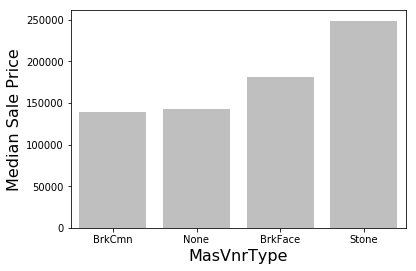

In [47]:
binning_check = train_df.groupby('MasVnrType')['SalePrice'].agg('median').sort_values().reset_index()
sns.barplot(binning_check['MasVnrType'], binning_check['SalePrice'], color = '.75')
plt.xlabel(binning_check.columns[0], size=16)
plt.ylabel('Median Sale Price', size=16)
plt.show()

In [34]:
binning_check.SalePrice

0    139000
1    143000
2    180750
3    248900
Name: SalePrice, dtype: int64

In [294]:
## Use pd.DataFrame.select_dtypes() to specify column types and return only those columns as a data frame.
#numeric_train = train.select_dtypes(include=['integer', 'float'])
#numeric_test = test.select_dtypes(include=['integer', 'float'])

In [297]:
#features = numeric_train.columns.drop("SalePrice")

In [33]:
X = all_data[:train_df.shape[0]]
y = np.log(train_df.SalePrice)

In [34]:
print(X.shape, y.shape, x_test.shape)

(1452, 134) (1452,) (1459, 80)


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.333, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1089, 134), (1089,), (363, 134), (363,))

In [41]:
lasso = linear_model.Lasso(alpha=1, tol=0.1)
lasso.fit(X_train, Y_train)
train_score =  lasso.score(X_train, Y_train)
val_score = lasso.score(X_test, Y_test)
total_score = lasso.score(X, y)
print("The training   R^2 is: %.5f" %train_score)
print("The validation R^2 is: %.5f" %val_score)
print("R^2 for total train data is: %.5f" %total_score)



The training   R^2 is: 0.82389
The validation R^2 is: 0.81208
R^2 for total train data is: 0.82107


In [42]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()
randomForest.fit(X, y)
train_error = (1 - randomForest.score(X, y))
#test_error = (1 - randomForest.score(X_test, y_test))
#print("The training error is: %.5f" %train_error)
#print("The test     error is: %.5f" %test_error)
print(randomForest.score(X, y))

0.974769880354


In [49]:
predictions = np.exp(predictions).shape

In [50]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor(random_state = 42)
randomForest.fit(X_train, Y_train)
train_score =  randomForest.score(X_train, Y_train)
predictions = randomForest.predict(test)
val_score = randomForest.score(X_test, Y_test)
total_score = randomForest.score(X, y)
print("The training   R^2 is: %.5f" %train_score)
print("The validation R^2 is: %.5f" %val_score)
print("R^2 for total train data is: %.5f" %total_score)

The training   R^2 is: 0.97929
The validation R^2 is: 0.87837
R^2 for total train data is: 0.95374


In [51]:
submission = pd.DataFrame()
submission['Id'] = test_df.Id

final_predictions = np.exp(predictions)
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

submission['SalePrice'] = final_predictions
submission.head()
submission.to_csv("solution.csv", index = False)


Original predictions are: 
 [ 11.57872381  12.01205311  12.146958    12.15705227  12.15609437] 

Final predictions are: 
 [ 106801.1326433   164728.36292617  188519.73978204  190432.34577759
  190250.01848297]
